In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.layers import Conv2D, Flatten, MaxPooling2D, Input
import cv2
import os

In [2]:
labels = os.listdir('../input/natural-images/natural_images')
labels

['motorbike', 'flower', 'fruit', 'cat', 'dog', 'airplane', 'car', 'person']

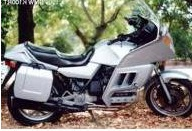

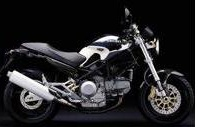

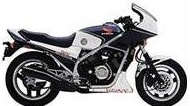

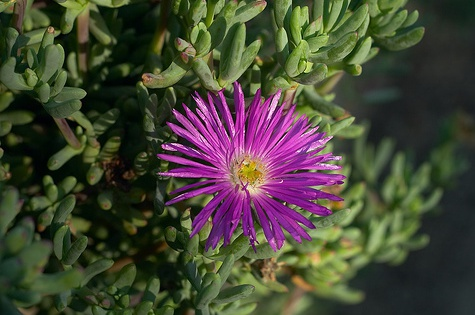

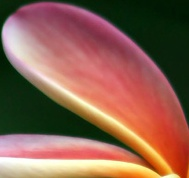

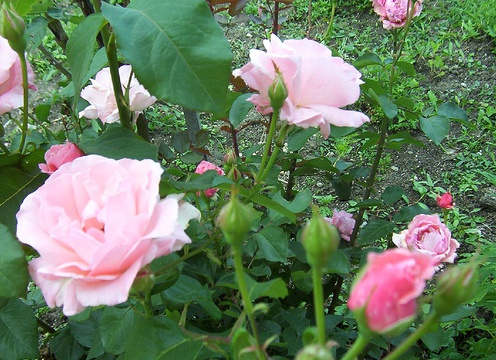

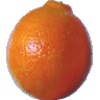

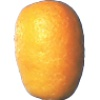

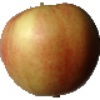

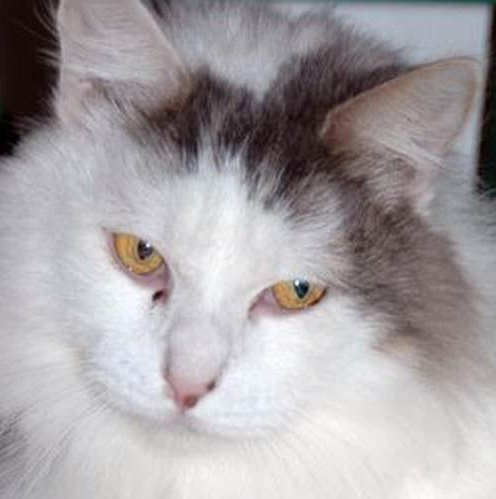

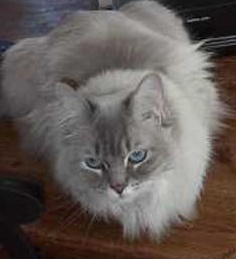

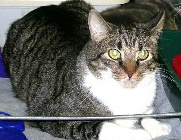

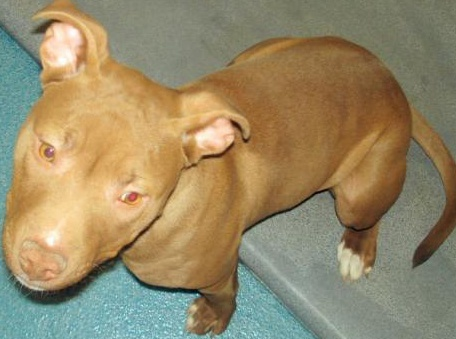

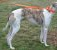

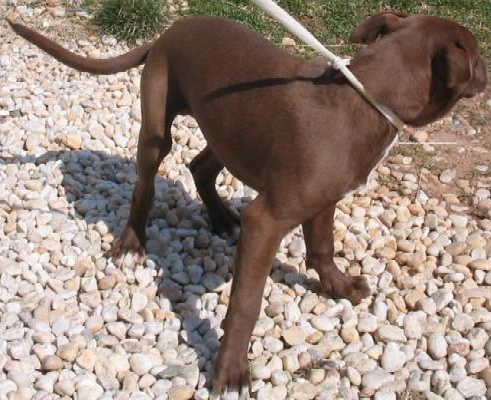

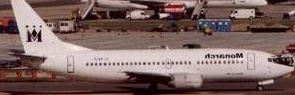

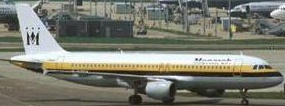

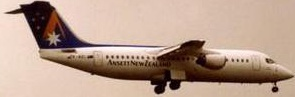

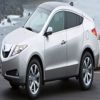

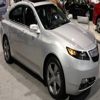

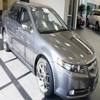

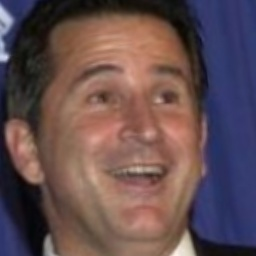

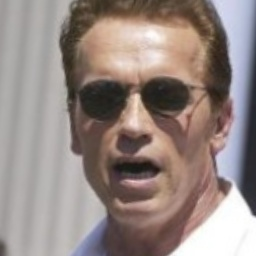

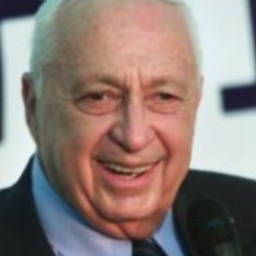

In [3]:
from IPython.display import display, Image

for label in labels:
    path = '../input/natural-images/natural_images/{}/'.format(label)
    img_data = os.listdir(path)
    
    k=0
    for image_data in img_data:
        if k < 3:
            display(Image(path+image_data))
        k += 1

In [4]:
x = []
y = []

for label in labels:
    path = '../input/natural-images/natural_images/{}/'.format(label)
    img_data = os.listdir(path)
    
    for image in img_data:
        a=cv2.imread(path+image)
        a = cv2.resize(a,(64,64))
        x.append(np.array(a.astype('float32'))/255)
        y.append(label)

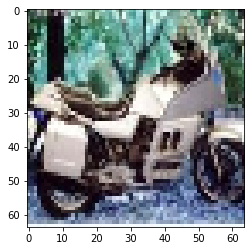

In [5]:
plt.imshow(x[0])

In [6]:
x = np.array(x)
x.shape

(6899, 64, 64, 3)

In [7]:
# x = x.reshape(-1,64,64,3)

In [8]:
x[0].shape

(64, 64, 3)

In [9]:
y_d = []
for i in y:
    if i == 'airplane':
        y_d.append(0)
    elif i == 'car':
        y_d.append(1)
    elif i == 'cat':
        y_d.append(2)
    elif i == 'dog':
        y_d.append(3)
    elif i == 'flower':
        y_d.append(4)
    elif i == 'fruit':
        y_d.append(5)
    elif i == 'human':
        y_d.append(6)
    else:
        y_d.append(7)

In [10]:
y = y_d

1

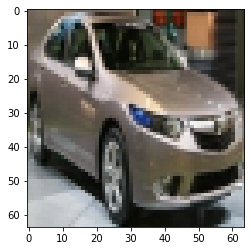

In [11]:
plt.imshow(x[5000])
y[5000]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.27)

In [13]:
# xtrain = xtrain.reshape(-1,64,64,4)
# xtrain.shape

In [14]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
ytrain = np.array(ytrain)

In [17]:
ytrain

array([3, 7, 3, ..., 3, 2, 7])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 100360    
Total params: 121,288
Trainable params: 121,288
Non-trainable params: 0
__________________________________________________

In [19]:
model.fit(xtrain,ytrain,batch_size=(256),epochs=25)

Epoch 1/25
20/20 [==============================] - 16s 793ms/step - loss: 1.3765 - accuracy: 0.5181
Epoch 2/25
20/20 [==============================] - 15s 766ms/step - loss: 0.8097 - accuracy: 0.7153
Epoch 3/25
20/20 [==============================] - 15s 753ms/step - loss: 0.5858 - accuracy: 0.7951
Epoch 4/25
20/20 [==============================] - 15s 770ms/step - loss: 0.4601 - accuracy: 0.8388
Epoch 5/25
20/20 [==============================] - 16s 799ms/step - loss: 0.3724 - accuracy: 0.8674
Epoch 6/25
20/20 [==============================] - 15s 767ms/step - loss: 0.3328 - accuracy: 0.8807
Epoch 7/25
20/20 [==============================] - 15s 753ms/step - loss: 0.2747 - accuracy: 0.9033
Epoch 8/25
20/20 [==============================] - 16s 775ms/step - loss: 0.2337 - accuracy: 0.9170
Epoch 9/25
20/20 [==============================] - 16s 779ms/step - loss: 0.2098 - accuracy: 0.9273
Epoch 10/25
20/20 [==============================] - 15s 759ms/step - loss: 0.1915 - accura

In [20]:
# plt.figure(figsize=(6,6))
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
# plt.show()

In [21]:
pred = model.predict(xtest)

In [22]:
diff = []
for i in pred:
    diff.append(np.argmax(i))

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(diff,ytest)

0.9162640901771336